In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from generateGif import create_animated_gif

from variants import RevolutePairPress, PrismaticPairPress
from optimization import optimize_function

Проверим работу симуляции: правильно ли она проходит?

Результат должен выдать в файлы `/tests_Prismatic.gif` и `/tests_Revolute.gif`


In [2]:
params_Revolute = np.zeros(9)
params_Revolute[0] = 3.0
params_Revolute[1] = 6.3
params_Revolute[2] = 5.4
params_Revolute[3] = 5.1
params_Revolute[4] = 4.5
params_Revolute[5] = -1
params_Revolute[6] = 8
params_Revolute[7] = 0.5
params_Revolute[8] = -30
RevolutePairPress.generateGif(params_Revolute, "tests_Revolute.gif")


params_Prismatic = np.zeros(8)
params_Prismatic[0] = 1.1
params_Prismatic[1] = 3.2
params_Prismatic[2] = 2.2
params_Prismatic[3] = 1.0
params_Prismatic[4] = 0.0
params_Prismatic[5] = 3.0
params_Prismatic[6] = 30.0
params_Prismatic[7] = -12.0

PrismaticPairPress.generateGif(params_Prismatic, "tests_Prismatic.gif")

Анимированный GIF сохранен как tests_Revolute.gif.
Анимированный GIF сохранен как tests_Prismatic.gif.


Проверим производительность вычислений

In [3]:
%timeit RevolutePairPress.simulate(params_Revolute)
%timeit PrismaticPairPress.simulate(params_Prismatic)

25.4 μs ± 2.24 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
28.8 μs ± 542 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Метрический синтез

Найти 1000 кандидатов на основе функции оптимизации

ОСТОРОЖНО! Оптимизация долгая

Сохраняются как `candidate_{i}.gif`

[ 56.69370575 169.11888207 258.91415462 289.34452817 471.92299274
  14.6920336  315.4350772  387.59037691 -79.24187089]
array([ 56.69370575, 169.11888207, 258.91415462, 289.34452817,
       471.92299274,  14.6920336 , 315.4350772 , 387.59037691,
       -79.24187089])Time above midpoint: 89.79552469135803% [ 56.69370575 169.11888207 258.91415462 289.34452817 471.92299274
  14.6920336  315.4350772  387.59037691 -79.24187089]
Анимированный GIF сохранен как candidate_0_Revolute.gif.
[ 44.9776221  268.3181452  453.44328323 393.34562322 470.1850528
 121.19198683 252.94867499 368.25317697 -77.74192289]
array([ 44.9776221 , 268.3181452 , 453.44328323, 393.34562322,
       470.1850528 , 121.19198683, 252.94867499, 368.25317697,
       -77.74192289])Time above midpoint: 90.32098765432099% [ 44.9776221  268.3181452  453.44328323 393.34562322 470.1850528
 121.19198683 252.94867499 368.25317697 -77.74192289]
Анимированный GIF сохранен как candidate_1_Revolute.gif.
[ 88.02681892 271.26224026 374.507

KeyboardInterrupt: 

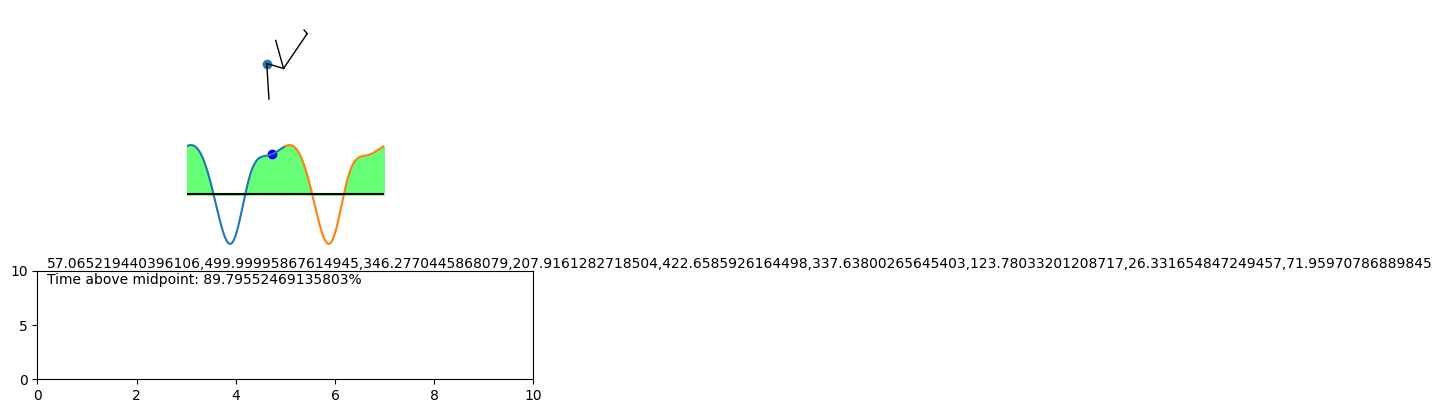

In [7]:
mechanism = RevolutePairPress
for i in range(1000):
    description, pp = optimize_function(mechanism)
    print(description, pp)
    mechanism.generateGif(pp, f"candidate_{i}_Revolute.gif")

В результате оптимизации получен лучший вариант: `RevolutePairPress` с параметрами, которые приведены ниже в коде. Проведём симуляцию для этого варианта и сохраним множество точек в файл, чтобы передать его программе динамического расчёта

In [9]:
# Округлено до более-менее ровных значений
bestParams = np.array([88.0, 270.0, 375.0, 101.5, 300.0, 27.0, 393.0, 192.0, 90.0])

RevolutePairPress.generateGif(bestParams, "bestCandidate.gif")

simResult = RevolutePairPress.simulate(bestParams)

with open("simulationResults.py", "w", encoding="utf-8") as f:
    f.write("from numpy import array,ndarray\n\n")
    f.write("simulationResults:tuple[ndarray,ndarray] = (array(")
    f.write(repr(simResult[0].tolist()))
    f.write("),array(")
    f.write(repr(simResult[1].tolist()))
    f.write("))")

print("Результат симуляции сохранён в simulationResults.py!")

Анимированный GIF сохранен как bestCandidate.gif.
Результат симуляции сохранён в simulationResults.py!
